In [1]:
import sklearn.metrics
from sklearn.utils import graph_shortest_path
import sklearn.feature_selection
import scipy.sparse
import time
import matplotlib.pyplot as plt
from helper import *
from directed_information import *
from calc import *
# np.set_printoptions(4, threshold=np.nan)
%matplotlib inline
%reload_ext autoreload
%autoreload 2

NUM_NEU = 10 # num neurons to test
NUM_FIRINGS = 1000

100%|██████████| 2/2 [00:00<00:00, 269.61it/s]


In [4]:
data, adj = load_and_shape_zaytsev(NUM_NEU, NUM_FIRINGS)

In [5]:
BIN_SIZE = 10
firings = gen_firings(data, BIN_SIZE)
np.clip(firings, 0, 1, out=firings)
MI = genMI(firings)
DI = genDI(firings)

100%|██████████| 10/10 [06:11<00:00, 36.74s/it]


/Users/ezshen/miniconda3/envs/p3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Users/ezshen/miniconda3/envs/p3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


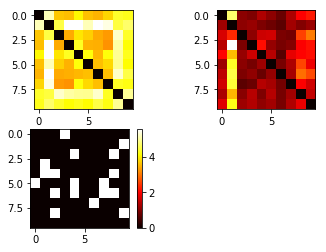

In [25]:
predMI = -np.log(MI)
predDI = 1/DI

adj = adj[:NUM_NEU, :NUM_NEU]
for i in range(len(adj)):
    adj[i,i] = 0
    predDI[i,i] = 0
    predMI[i,i] = 0
    
plt.subplot(2, 2, 1)
plt.imshow(normalize(predMI), cmap='hot', interpolation='nearest')
plt.subplot(2, 2, 2)
plt.imshow(normalize(predDI), cmap='hot', interpolation='nearest')
plt.subplot(2, 2, 3)
plt.imshow(normalize(adj), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.savefig('figures/heatmapcimi')

In [22]:
print(np.mean(np.abs(normalize(predDI) - adj)))
print(np.mean(np.abs(normalize(predMI) - adj)))

0.8789852381738095
0.8289873005099557
